In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

# READING AND CLEANING DATA
#filePath = r"C:\Users\jeffr\OneDrive\Desktop\vgsales.csv"
filePath = "https://raw.githubusercontent.com/JeffreyDAnderson/WGU_C964_Capstone_001397587/main/vgsales.csv"

dataset = pd.read_csv(filePath, header=0, usecols=['Platform','Year','Genre','Publisher','NA_Sales'], dtype={'Year':'Int64'})

# CLEANING FUNCTION FOR DATASET
# ALL ROWS WITH ANY MISSING DATA ARE DROPPED
# AS WELL AS ROWS LATER THAN 2016
def clean(dataset):
    dataset.dropna(inplace = True)
    dataset = dataset.loc[dataset['Year'] < 2016]
    return dataset

video_game_sales = clean(dataset)
recent_consoles = video_game_sales[video_game_sales['Year'] >= 2012]

PLATFORMS = recent_consoles.Platform.unique()
GENRES = video_game_sales.Genre.unique()
SALES_DATA_YEARS = video_game_sales.Year.unique()
PREDICTION_YEARS = list(range(2021, 2031))

In [2]:
# PREDICTION FUNCTIONS: USES LINEAR REGRESSION ALONG WITH A GENRE AND
# A YEAR TO PREDICT SALES FOR THAT YEAR
def salesPrediction(Genre, Year):
    sales = genresDict[Genre].sum()
    sales = sales.reset_index('Year')
    X = sales.iloc[:, :-1].values
    y = sales.iloc[:, 1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    estSales = int(regressor.coef_ * int(Year) + regressor.intercept_)
    
    print('Estimated sales: ', estSales, 'million\n')
    print('--------------------------------------------------------------------')
    print('ANALYSIS:')
    print('MAE - Mean Absolute Error: {0:.3f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
    print('MSE - Mean Squared Error: {0:.3f}'.format(metrics.mean_squared_error(y_test, y_pred)))
    print('RMSE - Root Mean Squared Error: {0:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

    
def makePrediction(Genre, Year):
    salesPrediction(Genre, Year)

In [3]:
def genreCounts(dataset):
    storageDict = {}
    for i in GENRES:
        tempdf = dataset[dataset['Genre'] == i]
        tempdf = tempdf.groupby(['Year'])
        storageDict[i] = tempdf
    return storageDict


def genreSalesPerYear(genreDict):
    storageDict = {}
    for i in GENRES:
        tempdf = genreDict[i]
        sales_per_year = tempdf.sum()
        storageDict[i] = sales_per_year
    return storageDict


def platformCounts(dataset):
    storageDict = {}
    for i in PLATFORMS:
        tempdf = dataset[dataset['Platform'] == i]
        tempdf = tempdf.groupby(['Year'])
        storageDict[i] = tempdf
    return storageDict


def platformSalesPerYear(platformDict):
    storageDict = {}
    for i in PLATFORMS:
        tempdf = platformDict[i]
        platform_per_year = tempdf.sum()
        storageDict[i] = platform_per_year
    return storageDict


# VARIABLES TO MAKE GRAPHING EASIER
genresDict = genreCounts(dataset)
genreSales = genreSalesPerYear(genresDict)

platformDict = platformCounts(video_game_sales)
platformSales = platformSalesPerYear(platformDict)

In [4]:
# GRAPH: TOTAL NORTH AMERICAN SALES PER YEAR BY GENRE

def changeGenre(Genre):
    plt.plot(genreSales[Genre])
    plt.title('North American Sales\nGenre: ' + str(Genre))
    plt.xlabel('Year')
    plt.ylabel('Sales in Millions')
    plt.show()

    
print('Use the following to select and view sales for any genre.')
print('---------------------------------------------------------')
interact(changeGenre, Genre=GENRES)

Use the following to select and view sales for any genre.
---------------------------------------------------------


interactive(children=(Dropdown(description='Genre', options=('Sports', 'Platform', 'Racing', 'Role-Playing', '…

<function __main__.changeGenre(Genre)>

In [5]:
# GRAPH: SHOWS NUMBER OF GAMES RELEASED FOR A SELECTED PLATFORM EACH YEAR

def changePlatform(Platform):
    given_year = platform_count_by_year[platform_count_by_year['Platform'] == Platform]
    year_counts = given_year['Year'].value_counts()
    platforms = pd.DataFrame({'Year':year_counts.index, 'Count':year_counts.values})
    platforms.sort_values(by=['Year'], inplace=True)
    platforms.plot.bar(x='Year', y='Count')
    
def test(Platform):
    plt.plot(platformSales[Platform])
    plt.title('North American Sales\nPlatform: ' + str(Platform))
    plt.xlabel('Year')
    plt.ylabel('Number of Games Released')
    plt.show()

print('Use the following to select and view number of')
print('video games released on the given platform.')
print('---------------------------------------------------------')
interact(test, Platform=PLATFORMS)

Use the following to select and view number of
video games released on the given platform.
---------------------------------------------------------


interactive(children=(Dropdown(description='Platform', options=('PS3', 'X360', '3DS', 'PS4', 'DS', 'XOne', 'Wi…

<function __main__.test(Platform)>

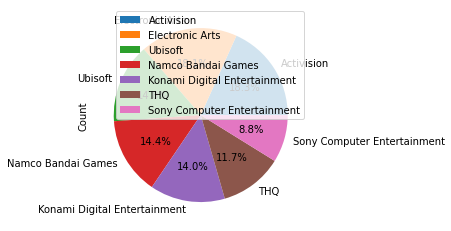

In [6]:
# PIE CHART SHOWING PUBLISHERS NUMBER OF GAMES RELEASED FOR A GIVEN YEAR
# THIS WILL SHOW WHICH PUBLISHERS ARE POPULAR IN THE GIVEN YEAR

# WILL START WITH GAMES RELEASED IN 2010
publisher_count_by_year = video_game_sales.filter(['Year', 'Publisher'], axis=1)

year = 2010
given_year = publisher_count_by_year[publisher_count_by_year['Year'] == year]
year_counts = given_year['Publisher'].value_counts()
publishers = pd.DataFrame({'Publisher':year_counts.index, 'Count':year_counts.values})
top = publishers.iloc[:7]
lab = top['Publisher']

plot = top.plot.pie(y='Count', labels=lab, autopct='%1.1f%%')

In [7]:
# PREDICTION MODEL:
# SELECT A GENRE AND YEAR TO GET A PREDICTION FOR SALES

print('SALES PREDICTION MODEL')
print('--------------------------------------------------------------------')
print('Select a Genre and a Year to obtain the predicted amount of sales.')
print('Sales are predicted for the North American market.')
interact(makePrediction, Genre=GENRES, Year=PREDICTION_YEARS)

SALES PREDICTION MODEL
--------------------------------------------------------------------
Select a Genre and a Year to obtain the predicted amount of sales.
Sales are predicted for the North American market.


interactive(children=(Dropdown(description='Genre', options=('Sports', 'Platform', 'Racing', 'Role-Playing', '…

<function __main__.makePrediction(Genre, Year)>

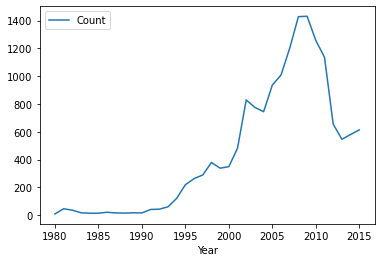

In [8]:
# GRAPH FOR THE COUNT OF GAMES RELEASED IN EACH YEAR
# USED TO SHOW OVERALL TREND IN GAME RELEASES
game_count_by_year = video_game_sales['Year'].value_counts()
game_count_frame = pd.DataFrame({'Year':game_count_by_year.index, 'Count':game_count_by_year.values})
game_count_frame.sort_values(by=['Year'], inplace=True)
game_count_frame.plot(x="Year", y="Count")
plt.show()